# Mapping horizontal oil wells in northeast Wyoming

First we need to make sure you have the xlrd and cartopy packages installed. The next cell installs both packages

In [ ]:
! pip install xlrd
! pip install cartopy

Then we can import pandas to read in our excel file, matplotlib for plotting up the data, and numpy for making an array later on. Also we want to plot in the notebook so we add the `%matplotlib inline` command as well 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

The data I am using in this notebook came from a new [report]('http://sales.wsgs.wyo.gov/influences-on-oil-and-natural-gas-production-from-the-wall-creek-and-turner-sandstone-reservoirs-powder-river-basin-wyoming-2019/?ctk=2a2030c2-bb60-4a4d-aa30-14502a0aee7c') released by the Wyoming State Geological Survey on production from the Turner and Wall Creek Sandstones in the Powder River Basin. More information can be found at the link or by following this reference: 

Toner, R.N., 2019, Influences on oil and natural gas production from the Wall Creek and Turner sandstone reservoirs, Powder River Basin, Wyoming: Wyoming State Geological Survey Report of Investigations 77, 84 p.

To get started with the data we read in the excel file. We add in the `sheet_name` argument so we can select which sheet we want data from. There are several sheets we can dig through for other data from the report if we want 

In [2]:
data = pd.read_excel(r'Appendix1_DataTables .xlsx', sheet_name='HorizontalWellCompletion') #read in the data

Check the head of the `DataFrame` to make see what the column names are and how the data is structured

In [3]:
data.head() #check the header

,API number,APINO,Company,Surface hole latitude (NAD83),Surface hole longitude (NAD83),Bottom hole latitude (NAD83),Bottom hole longitude (NAD83),Well type,WSGS reservoir,Total vertical depth at bottom hole (ft),Number of frac stages,Total slurry (bbl),Total proppant (lb),Surface-to-bottom hole length (ft),Producing interval length (ft),Lateral azimuth (°)
0,49-005-43307,543307,THE TERMO COMPANY,44.06884,-105.13920,44.07319,-105.122710,H,Turner,6325.00,NaN,NaN,NaN,4613.209075,3831.0,75.222237
1,49-005-45589,545589,EOG Y RESOURCES INC,43.67997,-105.66802,43.69113,-105.672250,H,Turner,10689.62,NaN,NaN,125124.0,4217.598301,3533.0,339.241676
2,49-005-60281,560281,EOG RESOURCES INC,43.53329,-105.43121,43.52093,-105.427393,H,Turner,10114.29,12.0,NaN,1992847.0,4615.909771,3754.0,162.838330
3,49-005-60880,560880,EOG RESOURCES INC,43.53269,-105.46218,43.52074,-105.455890,H,Turner,10118.80,13.0,36638.0,1992421.0,4662.652084,4000.0,152.239483
4,49-005-60883,560883,EOG RESOURCES INC,43.53544,-105.42470,43.54680,-105.433520,H,Turner,10025.20,13.0,NaN,2027081.0,4753.829417,4072.0,322.173933


Let's do a quick scatter plot of surface hole locations on the x and y axis (longitude and latitude), and for fun let's make the size of each point equal to the `'Total proppant'` column and scale it down a bit so it visualizes nicely. Also let's color each point by the `'Total slurry'` column and add a color bar. This is a good way to visualize a few extra dimensions into our spatial data

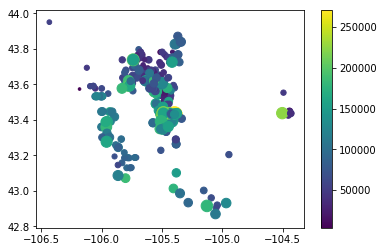

In [46]:
plt.scatter(data['Surface hole longitude (NAD83)'], data['Surface hole latitude (NAD83)'], s=data['Total proppant (lb)']/100000,
            c=data['Total slurry (bbl)'])
#scatter plot using longitude as x and latitude as y, size is equal to TVD and color the points by the total slurry in each well
plt.colorbar()
#add a color bar

Neat plot, but it's just surface hole location and some colors, where is this in the real world? Also where do the lateral portions of the wells go? To answer these questions let's first make two variables, one `sh` which is the surface hole location, and `bh` which is the bottom hole location

In [5]:
sh = data.iloc[:,3:5].values #surface hole location (x,y) pair
bh = data.iloc[:, 5:7].values #bottom hole location (x,y) pair

To make this plot look better we want to import `cartopy` to style up the map and put things in a geospatial perspective

In [8]:
import cartopy
import cartopy.crs as ccrs #import the coordinate refernce system
import cartopy.io.img_tiles as cimgt #this is for calling map tiles from mapbox
mapbox = cimgt.MapboxStyleTiles('pk.eyJ1IjoiamVzc2VwaXNlbCIsImEiOiJjanN3MG43Z2wwNmFoNDNzMTJncDdqMDV0In0.LCWlSCTZwv2j-9V5o1egWw', 'jessepisel', 'cjnlyd3ll0qh42smrrbe8q8c4')
#this creates a mapbox object that has an access token, username, and a mapID, this is the basemap we are going to use underneath our plot

Now that we have our imports out of the way and we have our mapbox object ready to go we can plot the data using a geographic coordinate system

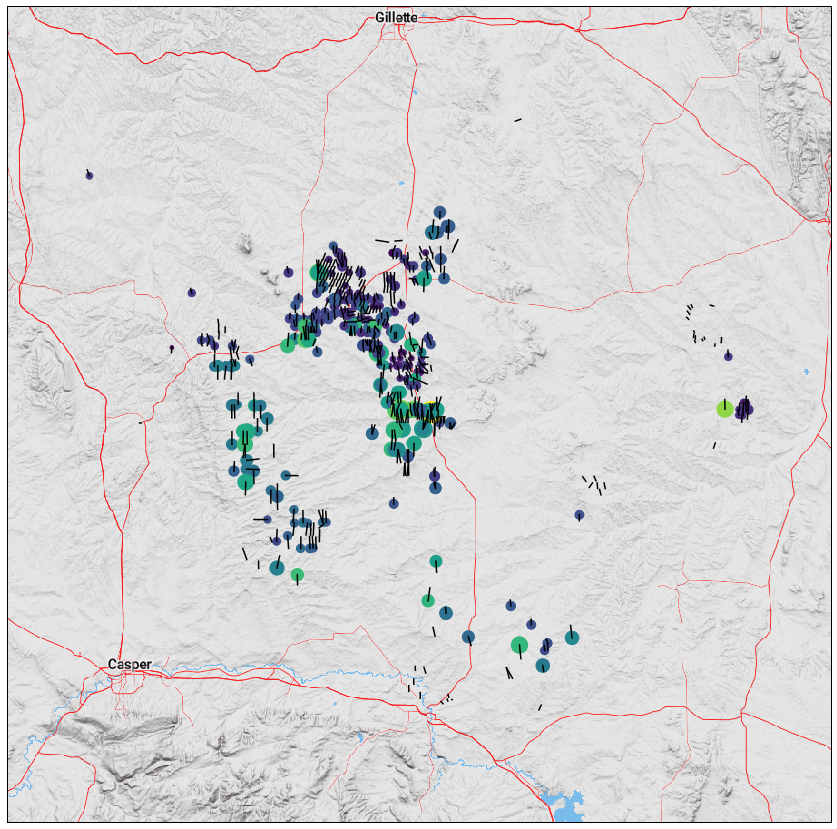

In [56]:
fig = plt.figure(figsize=(20,15)) #I like bigger figures

ax = plt.axes(projection=mapbox.crs) #this sets our plot axes to the mapbox coordinate reference system
ax.set_extent([sh[:,1].min()-0.25,sh[:,1].max()+0.25, sh[:,0].min()-0.25, sh[:,0].max()+0.25])
#we use the bounds of the data to set our plot and basemap limits
ax.add_image(mapbox, 9)
#then we add the tiles from mapbox at the specific zoom level (9)
#next we combine our surface hole and bottom hole locations and iterate through to plot laterals
for well in zip(sh, bh):
    well = np.array(well)
    ax.set_extent([sh[:,1].min()-0.25,sh[:,1].max()+0.25, sh[:,0].min()-0.25, sh[:,0].max()+0.25])
    #we use the bounds of the data to set our plot and basemap limits
    plt.plot(well[:, 1], well[:, 0], color='black', transform=ccrs.Geodetic()) 
    #this plos the laterals as black lines
plt.scatter(data['Surface hole longitude (NAD83)'], data['Surface hole latitude (NAD83)'], s=data['Total proppant (lb)']/50000,
            c=data['Total slurry (bbl)'], transform=ccrs.Geodetic())
#then we grab the surface hole location from above and plot the same way, the key is that we are using the transform argument
#this means it is all plotted in the same coordinate reference system

And there you have it! Our wells are plotted on a nice basemap from [mapbox]('https://www.mapbox.com/'), we colored wells by the amount of slurry used to hydraulically fracture them, and the size is related to the amount of proppant in each well. We can do the same thing with production or any other values from the excel spreadsheet. Play around with the different variables and see what you might find interesting.